In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import constants, os

In [2]:
folder = '/data2/gsampsonolalde/LEAPS-2024/Analysis/{}'
nameBase= folder.format('TimePlots/')

physical = {constants.SHOCK: ['Density', 'gasTemp', 'av', 'zeta', 'radfield', constants.SHOCKVEL],
            constants.HOTCORE: ['Density', 'gasTemp', 'av', 'zeta', 'radfield']}
species=['#CH3OH', 'CH3OH', '#SIO', 'SIO']

In [3]:
def buildDataframe(tipo): 
    df= pd.read_csv(folder.format(tipo)+'.csv', index_col=0)

    df = df.loc[:,['Time']+physical[tipo]+species+['runName']]
    for prop in physical[tipo]+species:
        with np.errstate(divide='ignore'): df[f'{prop}_log']=np.log10(df[prop])
    
    df=df.reset_index().drop(columns=['index'])
    df=df.join(pd.DataFrame(df['runName'].str.replace('.dat','').str.split('_').values.tolist(),
                            columns=constants.initparams[tipo]), rsuffix='_str')
    return df

In [4]:
tipo=constants.HOTCORE
df= buildDataframe(tipo)
df['normalizedTime']= df['Time']/df.groupby('runName')['Time'].transform('max')

In [84]:
especies=['#CH3OH_log', 'CH3OH_log', '#SIO_log', 'SIO_log']

def finalAbundanceDataframe(df, especies):
    dfFinal=df.loc[df['normalizedTime'] == 1]

    campos=['runName', 'Density_log', 'gasTemp_log', 'av_log', 'zeta_log', 'radfield_log', 'cosmicRay', 'interstellarRad', 'iDens', 'fTemp', 'normalizedTime']

    tDic=dict([(key, []) for key in campos+['abundance_log', 'species']])
    for i in dfFinal.index:
        for spec in especies:
            tDic['abundance_log'].append(dfFinal.at[i,spec]) 
            tDic['species'].append(spec)
            for c in campos:
                tDic[c].append(dfFinal.at[i,c])
    return pd.DataFrame(tDic)

In [87]:
dfFinal= finalAbundanceDataframe(df, especies)

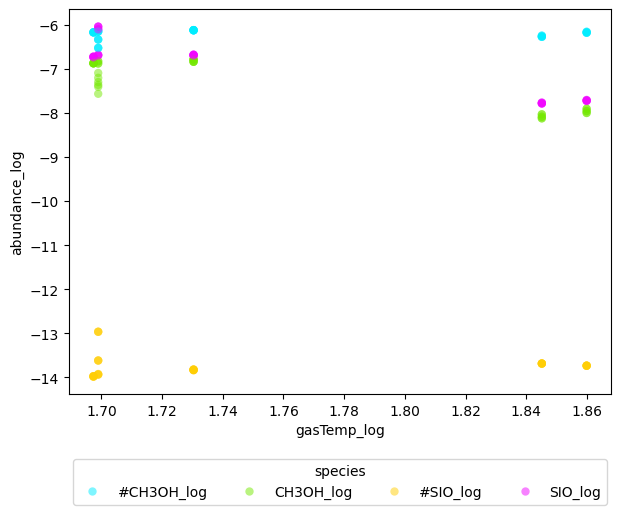

In [116]:
fig, ax = plt.subplots(figsize=(7,5))
sns.scatterplot(dfFinal, y='abundance_log', x='gasTemp_log',
             hue='species', palette='gist_ncar',
             linewidth=0, ax=ax, alpha=0.5,
             )
sns.move_legend(ax, "upper center", bbox_to_anchor=(0.5, -0.15), ncol=4)
# ax.text(0.5, 0.5, 'matplotlib', horizontalalignment='center',
#         verticalalignment='center', transform=ax.transAxes)

In [10]:
tipo=constants.SHOCK
df= buildDataframe(tipo)
df['normalizedTime']= df['Time']/df.groupby('runName')['Time'].transform('max')